In [1]:
import pandas as pd 
import matplotlib. pyplot as plt 
import seaborn as sns
from matplotlib import style 
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, f1_score



In [2]:
df = pd.read_csv("/home/luo/projects/MDD/data/depress twitter english/depress_twitter_English.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   1000 non-null   object
 1   label   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [3]:
def data_preprocessing (text):
    if isinstance(text, float):
        text=''

    text = text.lower()
    text = re.sub(r"http\s+|www\S+http\S+", "",text,flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub("user",'',text)
    text = re.sub("url",'',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [4]:
df.text = df["tweet"].apply(data_preprocessing)
df.head()

/tmp/ipykernel_3474944/1806502255.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.text = df["tweet"].apply(data_preprocessing)


,tweet,label
0,I just don’t take my baby out because it gives...,1
1,Suicide figures are up 200% since lockdown. \n...,1
2,she has really been feeding us this week https...,0
3,"I can confirm that yes, I do need to stay on m...",1
4,"Today is pie day! Celebrate with your ""I Ate P...",0


C:\Users\xingr\AppData\Local\Temp\ipykernel_31312\2792092777.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.text = df["tweet"].apply(data_preprocessing)


<Axes: xlabel='label', ylabel='count'>

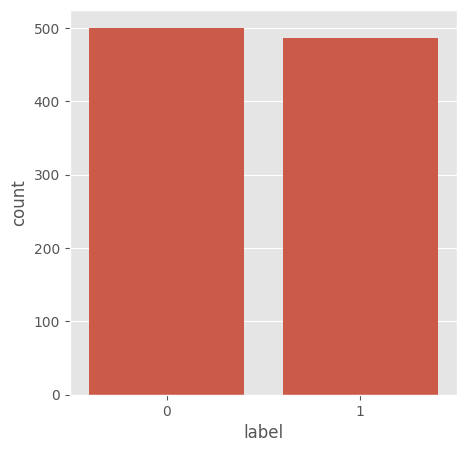

In [5]:

df.text = df["tweet"].apply(data_preprocessing)
df = df.drop_duplicates('tweet')
df['label'].value_counts()
fig = plt.figure(figsize=(5,5))
sns.countplot(x = 'label', data=df)

In [5]:
vect = TfidfVectorizer(ngram_range = (1,2)).fit(df['tweet'])
feature_names = vect.get_feature_names_out()
print('Number of features :{}\n'.format(len(feature_names)))
print('First 20 features: \n{}'.format(feature_names[:20]))

Number of features :21833

First 20 features: 
['000' '000 and' '000 collaborative' '000 strangers' '01' '01 20am'
 '01 at' '02jril6bhv' '03' '03 school' '06' '06 15' '07749' '07749 371571'
 '0800' '0800 567' '09' '09 15' '09 views' '094']


In [6]:
X = df['tweet']
Y = df['label']
X = vect.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.2, random_state= 42)

x_train = x_train[y_train.notna()]
y_train = y_train.dropna()

x_test = x_test[y_test.notna()]
y_test = y_test.dropna()

print(f'size of x_train {x_train.shape}')
print(f'size of y_train {y_train.shape}')
print(f'size of x_test {x_test.shape}')
print(f'size of y_test {y_test.shape}')

size of x_train (800, 21833)
size of y_train (800,)
size of x_test (200, 21833)
size of y_test (200,)


In [7]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict,y_test)
print('Test accuarcy : {:.2f}%'.format(logreg_acc*100))
print(round(f1_score(y_test, logreg_predict,pos_label=1.0),2))

Test accuarcy : 84.00%
0.83


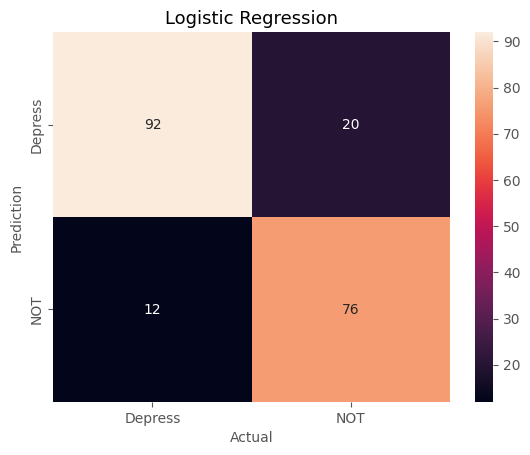

In [8]:
cm = confusion_matrix(y_test,logreg_predict)
sns.heatmap(cm,
            annot= True,
            fmt='g',
            xticklabels=['Depress','NOT'],
            yticklabels=['Depress','NOT'])
plt.ylabel('Prediction', fontsize = 10)
plt.xlabel('Actual',fontsize = 10)
plt.title("Logistic Regression", fontsize = 13)
plt.show()
